# Binomial parameter
## 1. Prelude

In [1]:
import ROOT
import math
import scipy
import scipy.special

Welcome to JupyROOT 6.08/06


In [2]:
def binomial(n,N,p):
    return scipy.special.binom(N,n) * (p**n) * ((1-p)**(N-n))

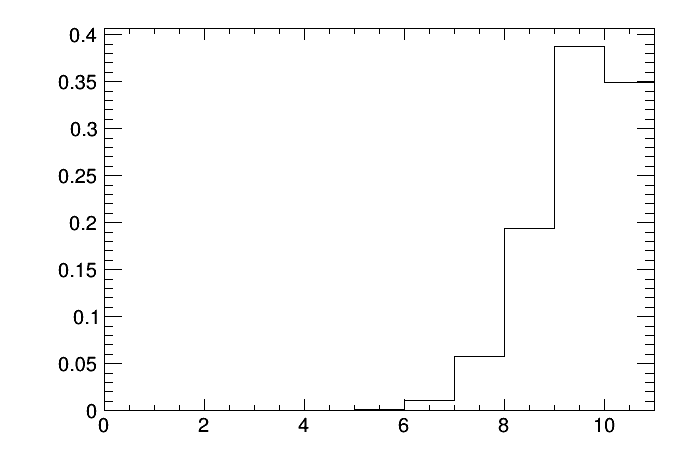

In [3]:
N=10
p=0.9

hist = ROOT.TH1F("hist","Binomial law",11,0,11)
for i in range(0,11):
    hist.SetBinContent(i+1,binomial(i,N,p))
    
c1 = ROOT.TCanvas()
hist.Draw()
c1.Draw()

In [4]:
def mle(n,N):
    return float(n)/N

def random_binomial(N,p):
    sum = 0
    for i in range(0,N):
        rnd = ROOT.gRandom.Uniform(0,1)
        if (rnd<p):
            sum = sum + 1
    return sum

## 2. Interval estimation

In [5]:
def Zalpha(alpha):
    return math.sqrt(2)*ROOT.TMath.ErfInverse(1-alpha)

In [6]:
def Wald(n,N,alpha):
    phat = mle(n,N)
    var = phat*(1-phat)/N
    low = phat - Zalpha(alpha)*math.sqrt(var)
    high = phat + Zalpha(alpha)*math.sqrt(var)
    return [low,high]

In [7]:
def Wilson(n,N,alpha):
    phat = mle(n,N)
    T = Zalpha(alpha)**2 / N
    ptilde = (phat + T/2) / (1 + T)
    low = ptilde - math.sqrt(phat*(1-phat)*T + T*T/4) / (1+T)
    high = ptilde + math.sqrt(phat*(1-phat)*T + T*T/4) / (1+T)
    return [low,high]

In [8]:
def AgrestiCoull(n,N,alpha):
    phat = mle(n,N)
    T = Zalpha(alpha)**2 / N
    ptilde = (phat + T/2) / (1 + T)
    var = ptilde*(1-ptilde)/N
    low = ptilde - Zalpha(alpha)*math.sqrt(var)
    high = ptilde + Zalpha(alpha)*math.sqrt(var)
    return [low,high]

Warning in <TROOT::Append>: Replacing existing TH1: histBeltl (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histBelth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histBelt (Potential memory leak).


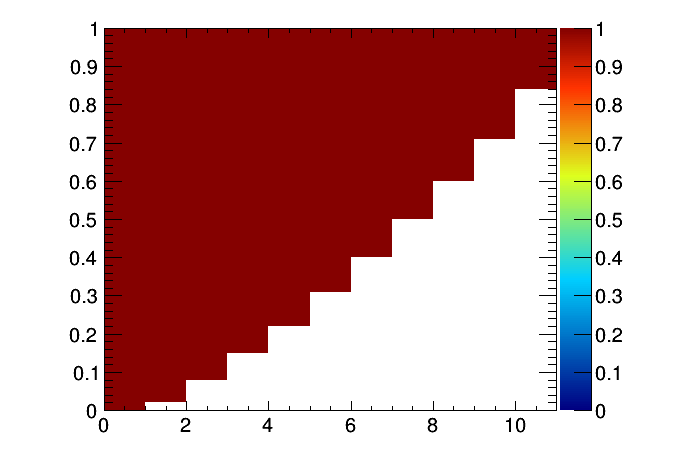

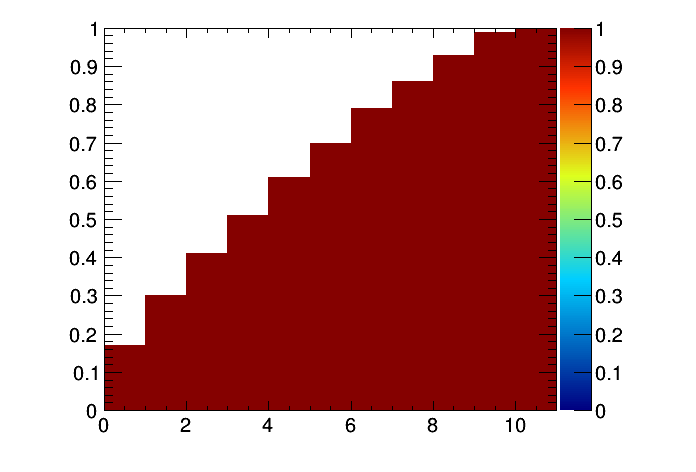

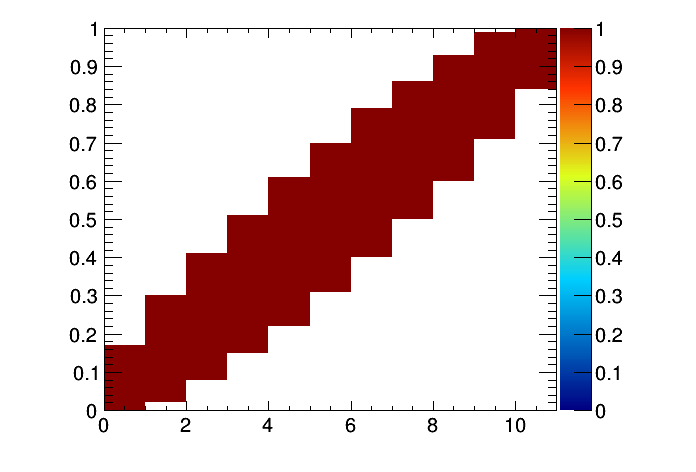

In [25]:
# Neyman construction for Clopper-Pearson

def binomial_cdf(n,N,p):
    sum = 0
    for i in range(0,n+1):
        sum = sum + binomial(i,N,p)
    return sum

def binomial_cdfc(n,N,p):
    sum = 0
    for i in range(n,N+1):
        sum = sum + binomial(i,N,p)
    return sum

def neyman_low_p(N,p,a):
    ans = []
    for i in range(0,N+1):
        cdf = binomial_cdf(i,N,p)
        if (cdf<=a/2.):
            ans.append(0)
        else:
            ans.append(1)
    return ans

def neyman_high_p(N,p,a):
    ans = []
    for i in range(0,N+1):
        cdfc = binomial_cdfc(i,N,p)
        if (cdfc<=a/2.):
            ans.append(0)
        else:
            ans.append(1)
    return ans

alpha = 1-0.6827
N = 10
histBeltl = ROOT.TH2F("histBeltl","Confidence belt (low)",N+1,0,N+1,100,0,1)
histBelth = ROOT.TH2F("histBelth","Confidence belt (high)",N+1,0,N+1,100,0,1)
histBelt = ROOT.TH2F("histBelt","Confidence belt",N+1,0,N+1,100,0,1)

for i in range(0,100):
    p = i*0.01
    lowb = neyman_low_p(N,p,alpha)
    highb = neyman_high_p(N,p,alpha)
    for j in range(0,len(lowb)):
        histBeltl.SetBinContent(j+1,i+1,highb[j])
        histBelth.SetBinContent(j+1,i+1,lowb[j])
        histBelt.SetBinContent(j+1,i+1,lowb[j]*highb[j])

cbeltl = ROOT.TCanvas()
histBeltl.Draw("COLZ")
cbeltl.Draw()
cbelth = ROOT.TCanvas()
histBelth.Draw("COLZ")
cbelth.Draw()
cbelt = ROOT.TCanvas()
histBelt.Draw("COLZ")
cbelt.Draw()

### 2.1 Specific cases

In [10]:
alpha = 1-0.6827
# case 1
N=10
n=9
print "N=",N, ", n=", n
print "Wald:", Wald(n,N,alpha)
print "Wilson:", Wilson(n,N,alpha)
print "Agresti-Coull:", AgrestiCoull(n,N,alpha)

N= 10 , n= 9
Wald: [0.805129610288262, 0.994870389711738]
Wilson: [0.76614359687565, 0.9611262591940357]
Agresti-Coull: [0.755110850748259, 0.9721590053214267]


In [11]:
# case 2
N=10
n=5
print "N=",N, ", n=", n
print "Wald:", Wald(n,N,alpha)
print "Wilson:", Wilson(n,N,alpha)
print "Agresti-Coull:", AgrestiCoull(n,N,alpha)

N= 10 , n= 5
Wald: [0.34188268381377, 0.6581173161862299]
Wilson: [0.349241351895743, 0.650758648104257]
Agresti-Coull: [0.34188268381377, 0.6581173161862299]


In [12]:
# case 3
N=100
n=90
print "N=",N, ", n=", n
print "Wald:", Wald(n,N,alpha)
print "Wilson:", Wilson(n,N,alpha)
print "Agresti-Coull:", AgrestiCoull(n,N,alpha)

N= 100 , n= 90
Wald: [0.8699993486003104, 0.9300006513996897]
Wilson: [0.8659260893104963, 0.9261527780389889]
Agresti-Coull: [0.8655178327451155, 0.9265610346043697]


In [13]:
# case 4
N=10
n=10
print "N=",N, ", n=", n
print "Wald:", Wald(n,N,alpha)
print "Wilson:", Wilson(n,N,alpha)
print "Agresti-Coull:", AgrestiCoull(n,N,alpha)

N= 10 , n= 10
Wald: [1.0, 1.0]
Wilson: [0.9090873200871072, 1.0]
Agresti-Coull: [0.8886710971516405, 1.0204162229354667]


## 3. Coverage

In [14]:
Ntoys=1000
N=10
p=0.95
alpha = 1-0.68

sumWald=0
sumWilson=0
sumAC=0

for i in range(0,Ntoys):
    ntoy = random_binomial(N,p)
    phat = mle(ntoy,N)
    intWald = Wald(ntoy,N,alpha)
    #print phat, intWald[0], intWald[1]
    intWilson = Wilson(ntoy,N,alpha)
    intAC = AgrestiCoull(ntoy,N,alpha)
    if (p>=intWald[0] and p<=intWald[1]):
        sumWald = sumWald+1
    if (p>=intWilson[0] and p<=intWilson[1]):
        sumWilson = sumWilson+1
    if (p>=intAC[0] and p<=intAC[1]):
        sumAC = sumAC+1
        
print "coverage (N = ", N, "p = ", p, "1-alpha = ", 1-alpha, "):"
print "Wald:", float(sumWald)/Ntoys
print "Wilson:", float(sumWilson)/Ntoys
print "Agresti-Coul:", float(sumAC)/Ntoys

coverage (N =  10 p =  0.95 1-alpha =  0.68 ):
Wald: 0.331
Wilson: 0.909
Agresti-Coul: 0.909


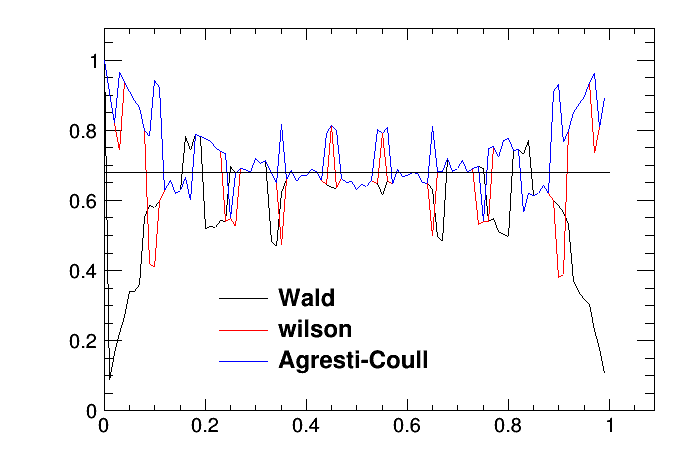

In [15]:
# loop on p, for fixed N
from array import array

array_p = []
array_Wald = []
array_Wilson = []
array_AC = []

for i in range(0,100):
    p = 0.01*i
    array_p.append(p)
    
    sumWald=0
    sumWilson=0
    sumAC=0
    for i in range(0,Ntoys):
        ntoy = random_binomial(N,p)
        phat = mle(ntoy,N)
        intWald = Wald(ntoy,N,alpha)
        #print phat, intWald[0], intWald[1]
        intWilson = Wilson(ntoy,N,alpha)
        intAC = AgrestiCoull(ntoy,N,alpha)
        if (p>=intWald[0] and p<=intWald[1]):
            sumWald = sumWald+1
        if (p>=intWilson[0] and p<=intWilson[1]):
            sumWilson = sumWilson+1
        if (p>=intAC[0] and p<=intAC[1]):
            sumAC = sumAC+1
    
    array_Wald.append(float(sumWald)/Ntoys)
    array_Wilson.append(float(sumWilson)/Ntoys)
    array_AC.append(float(sumAC)/Ntoys)
    
gWald = ROOT.TGraph(len(array_p),array('d',array_p),array('d',array_Wald))
gWilson = ROOT.TGraph(len(array_p),array('d',array_p),array('d',array_Wilson))
gAC = ROOT.TGraph(len(array_p),array('d',array_p),array('d',array_AC))

gWilson.SetLineColor(ROOT.kRed)
gAC.SetLineColor(ROOT.kBlue)

gWald.Draw("AL")
gWilson.Draw("L")
gAC.Draw("L")
tl = ROOT.TLine()
tl.DrawLine(0,0.68,1,0.68)

tleg = ROOT.TLegend(0.3,0.2,0.7,0.4)
tleg.SetBorderSize(0)
tleg.AddEntry(gWald,"Wald","L")
tleg.AddEntry(gWilson,"wilson","L")
tleg.AddEntry(gAC,"Agresti-Coull","L")

tleg.Draw()

c1.Draw()

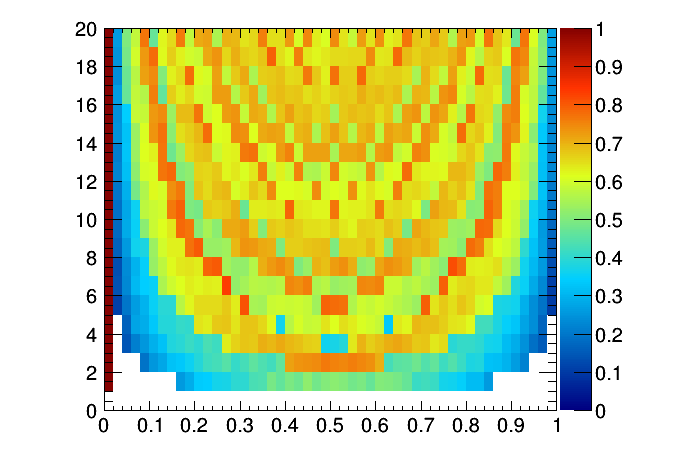

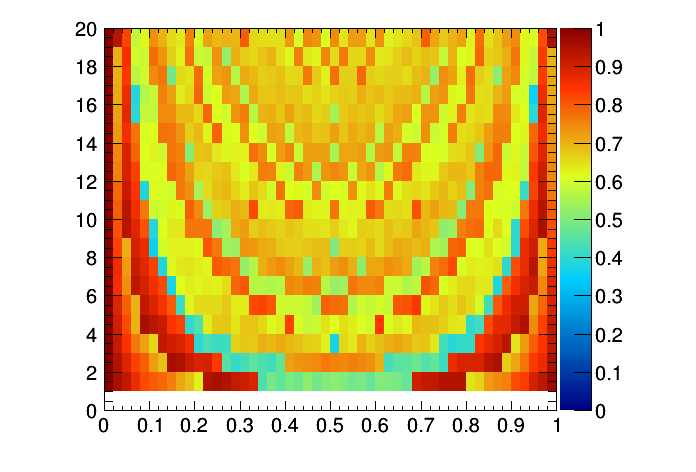

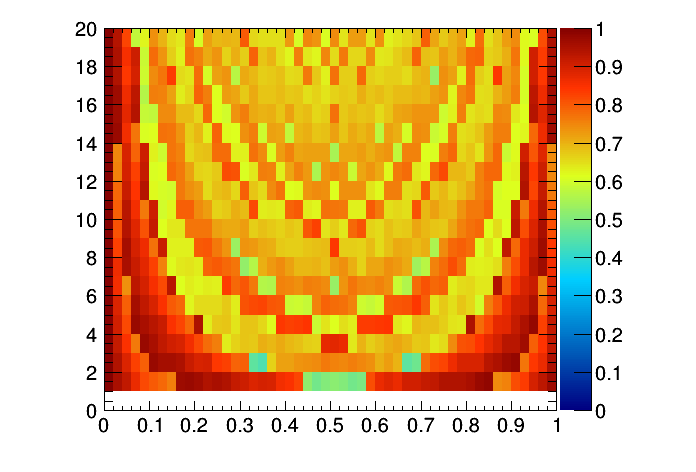

In [16]:
# now vary N too

array2_Np = []
array2_Wald = []
array2_Wilson = []
array2_AC = []

for N in range(2,21):

    array_p = []
    array_Wald = []
    array_Wilson = []
    array_AC = []

    for i in range(0,50):
        p = 0.02*i
        array_p.append([N,p])
        
        sumWald=0
        sumWilson=0
        sumAC=0
        for i in range(0,Ntoys):
            ntoy = random_binomial(N,p)
            phat = mle(ntoy,N)
            intWald = Wald(ntoy,N,alpha)
            #print phat, intWald[0], intWald[1]
            intWilson = Wilson(ntoy,N,alpha)
            intAC = AgrestiCoull(ntoy,N,alpha)
            if (p>=intWald[0] and p<=intWald[1]):
                sumWald = sumWald+1
            if (p>=intWilson[0] and p<=intWilson[1]):
                sumWilson = sumWilson+1
            if (p>=intAC[0] and p<=intAC[1]):
                sumAC = sumAC+1
    
        array_Wald.append(float(sumWald)/Ntoys)
        array_Wilson.append(float(sumWilson)/Ntoys)
        array_AC.append(float(sumAC)/Ntoys)
    
    array2_Np.append(array_p)
    array2_Wald.append(array_Wald)
    array2_Wilson.append(array_Wilson)
    array2_AC.append(array_AC)

h2_Wald = ROOT.TH2F("h2Wald","Wald",50,0,1,20,0,20)
h2_Wilson = ROOT.TH2F("h2Wilson","Wilson",50,0,1,20,0,20)
h2_AC = ROOT.TH2F("h2AC","Agresti-Coull",50,0,1,20,0,20)

for i in range(0,len(array2_Np)):
    a1p = array2_Np[i]
    a1Wa = array2_Wald[i]
    a1Wi = array2_Wilson[i]
    a1AC = array2_AC[i]
    
    for j in range(0,len(a1p)):
        h2_Wald.SetBinContent(j+1,a1p[i][0],a1Wa[j])
        h2_Wilson.SetBinContent(j+1,a1p[i][0],a1Wi[j])
        h2_AC.SetBinContent(j+1,a1p[i][0],a1AC[j])

ROOT.gStyle.SetPadRightMargin(0.2)
cWald = ROOT.TCanvas()
h2_Wald.Draw("COLZ")
cWald.Draw()

cWilson = ROOT.TCanvas()
h2_Wilson.Draw("COLZ")
cWilson.Draw()

cAC = ROOT.TCanvas()
h2_AC.Draw("COLZ")
cAC.Draw()


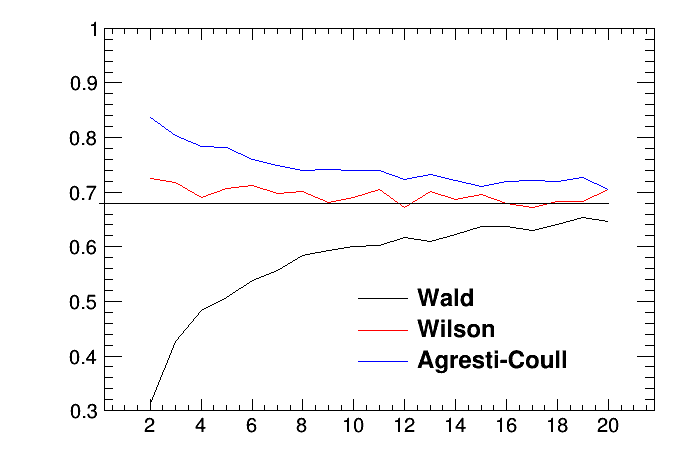

In [17]:
# average coverage as a function of N

arrayN_N = []
arrayN_Wald = []
arrayN_Wilson = []
arrayN_AC = []

for i in range(0,len(array2_Np)):
    a1p = array2_Np[i]
    a1Wa = array2_Wald[i]
    a1Wi = array2_Wilson[i]
    a1AC = array2_AC[i]
    
    sumWa = 0
    sumWi = 0
    sumAC = 0
    arrayN_N.append(a1p[0][0])
    
    for j in range(0,len(a1p)):
        sumWa = sumWa + a1Wa[j]
        sumWi = sumWi + a1Wi[j]
        sumAC = sumAC + a1AC[j]
    
    arrayN_Wald.append(float(sumWa)/len(a1Wa))
    arrayN_Wilson.append(float(sumWi)/len(a1Wi))
    arrayN_AC.append(float(sumAC)/len(a1AC))

gNWald = ROOT.TGraph(len(arrayN_N), array('d',arrayN_N), array('d',arrayN_Wald))
gNWilson = ROOT.TGraph(len(arrayN_N), array('d',arrayN_N), array('d',arrayN_Wilson))
gNAC = ROOT.TGraph(len(arrayN_N), array('d',arrayN_N), array('d',arrayN_AC))

gNWilson.SetLineColor(ROOT.kRed)
gNAC.SetLineColor(ROOT.kBlue)

c1.cd()
gNWald.Draw("AL")
gNWald.GetHistogram().GetYaxis().SetRangeUser(0.3,1)
gNWilson.Draw("L")
gNAC.Draw("L")
tl = ROOT.TLine()
tl.DrawLine(0,0.68,20,0.68)

tleg = ROOT.TLegend(0.5,0.2,0.9,0.4)
tleg.SetBorderSize(0)
tleg.AddEntry(gNWald,"Wald","L")
tleg.AddEntry(gNWilson,"Wilson","L")
tleg.AddEntry(gNAC,"Agresti-Coull","L")

tleg.Draw()

c1.Draw()